<a href="https://colab.research.google.com/github/GargiGhosh03/Apple-Watch-and-fitbit-data-processing-and-predict/blob/main/Apple_Watch_and_fitbit_data_processing_and_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# Data Collection, Data Cleaning & Data Manipulation
import numpy as np
import pandas as pd
from sklearn import datasets

# Data Visualization
import matplotlib
# Apple Watch and fitbit data processing and predect
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 1)

# Data Transformation
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy import stats

# Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn import set_config
set_config(display='diagram')

# Models Building
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# Classification Problems
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Regression Problems
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.exceptions import ConvergenceWarning

# Explainbale AI (XAI)
# !pip install lime
# import lime.lime_tabular
# !pip install shap
# import shap

# Unsupervised Learning: Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch, MeanShift, SpectralClustering
from sklearn.metrics import adjusted_rand_score

In [24]:
data = pd.read_csv('/content/aw_fb_data.csv.zip')

In [25]:
data.head()

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,2,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,3,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,4,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,5,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying


In [26]:
data.shape

(6264, 20)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6264 entries, 0 to 6263
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6264 non-null   int64  
 1   X1                    6264 non-null   int64  
 2   age                   6264 non-null   int64  
 3   gender                6264 non-null   int64  
 4   height                6264 non-null   float64
 5   weight                6264 non-null   float64
 6   steps                 6264 non-null   float64
 7   hear_rate             6264 non-null   float64
 8   calories              6264 non-null   float64
 9   distance              6264 non-null   float64
 10  entropy_heart         6264 non-null   float64
 11  entropy_setps         6264 non-null   float64
 12  resting_heart         6264 non-null   float64
 13  corr_heart_steps      6264 non-null   float64
 14  norm_heart            6264 non-null   float64
 15  intensity_karvonen   

In [28]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,6264.0,3132.500000,1808.405375,1.000000,1566.750000,3132.500000,4698.250000,6264.000000
X1,6264.0,1771.144317,1097.988748,1.000000,789.750000,1720.000000,2759.250000,3670.000000
age,6264.0,29.158525,8.908978,18.000000,23.000000,28.000000,33.000000,56.000000
gender,6264.0,0.476533,0.499489,0.000000,0.000000,0.000000,1.000000,1.000000
height,6264.0,169.709052,10.324698,143.000000,160.000000,168.000000,180.000000,191.000000
weight,6264.0,69.614464,13.451878,43.000000,60.000000,68.000000,77.300000,115.000000
steps,6264.0,109.562268,222.797908,1.000000,5.159534,10.092029,105.847222,1714.000000
hear_rate,6264.0,86.142331,28.648385,2.222222,75.598079,77.267680,95.669118,194.333333
calories,6264.0,19.471823,27.309765,0.056269,0.735875,4.000000,20.500000,97.500000
distance,6264.0,13.832555,45.941437,0.000440,0.019135,0.181719,15.697188,335.000000


In [29]:
data.describe()

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance
count,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000
mean,3132.500000,1771.144317,29.158525,0.476533,169.709052,69.614464,109.562268,86.142331,19.471823,13.832555,6.030314,5.739984,65.869938,0.306447,20.272393,0.155479,8.110854,590.035239
std,1808.405375,1097.988748,8.908978,0.499489,10.324698,13.451878,222.797908,28.648385,27.309765,45.941437,0.765574,1.256348,21.203017,0.775418,28.388116,0.210927,12.535080,4063.838530
min,1.000000,1.000000,18.000000,0.000000,143.000000,43.000000,1.000000,2.222222,0.056269,0.000440,0.000000,0.000000,3.000000,-1.000000,-76.000000,-2.714286,0.000000,0.000690
25%,1566.750000,789.750000,23.000000,0.000000,160.000000,60.000000,5.159534,75.598079,0.735875,0.019135,6.108524,5.909440,58.134333,-0.467303,1.148883,0.009819,0.264722,0.659260
50%,3132.500000,1720.000000,28.000000,0.000000,168.000000,68.000000,10.092029,77.267680,4.000000,0.181719,6.189825,6.157197,75.000000,0.665829,9.820254,0.079529,2.893503,13.368619
75%,4698.250000,2759.250000,33.000000,1.000000,180.000000,77.300000,105.847222,95.669118,20.500000,15.697188,6.247928,6.247928,76.138701,1.000000,27.077336,0.211868,9.679672,93.728562
max,6264.000000,3670.000000,56.000000,1.000000,191.000000,115.000000,1714.000000,194.333333,97.500000,335.000000,6.475733,6.475733,155.000000,1.000000,156.319444,1.297980,74.457929,51520.000000


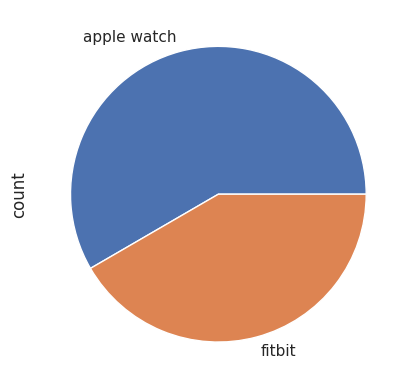

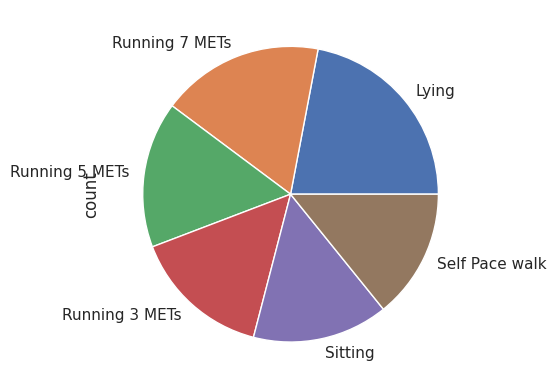

In [30]:
for col in data.select_dtypes('object'):
    plt.figure()
    data[col].value_counts().plot.pie()

<Axes: xlabel='gender', ylabel='count'>

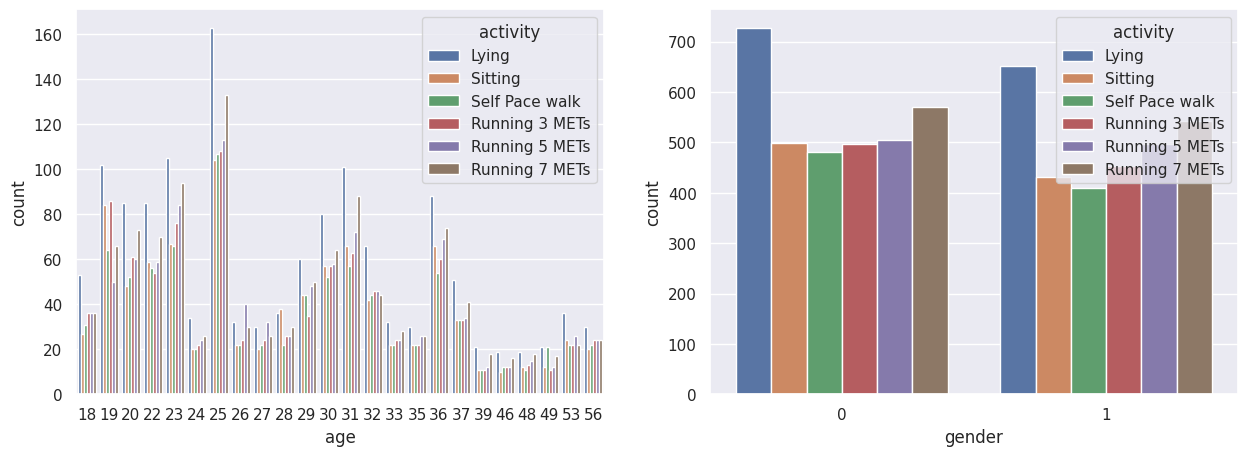

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(ax=axs[0],x='age', hue='activity', data=data)
sns.countplot(ax=axs[1],x='gender', hue='activity', data=data)

<Axes: xlabel='device', ylabel='activity'>

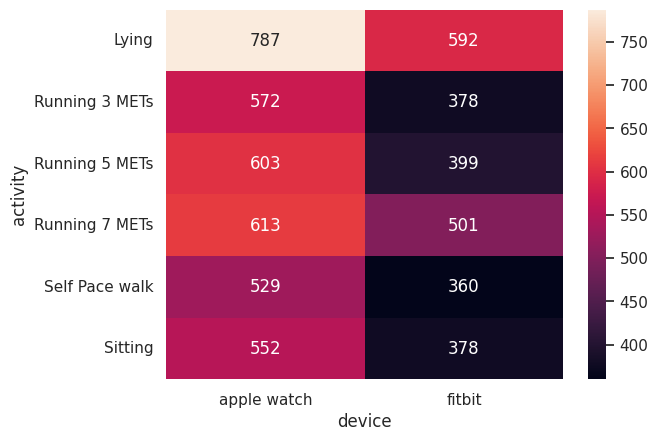

In [32]:
sns.heatmap(pd.crosstab(data["activity"],data["device"]),annot=True,fmt='d')

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'X1'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>],
       [<Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'steps'}>,
        <Axes: title={'center': 'hear_rate'}>],
       [<Axes: title={'center': 'calories'}>,
        <Axes: title={'center': 'distance'}>,
        <Axes: title={'center': 'entropy_heart'}>,
        <Axes: title={'center': 'entropy_setps'}>],
       [<Axes: title={'center': 'resting_heart'}>,
        <Axes: title={'center': 'corr_heart_steps'}>,
        <Axes: title={'center': 'norm_heart'}>,
        <Axes: title={'center': 'intensity_karvonen'}>],
       [<Axes: title={'center': 'sd_norm_heart'}>,
        <Axes: title={'center': 'steps_times_distance'}>, <Axes: >,
        <Axes: >]], dtype=object)

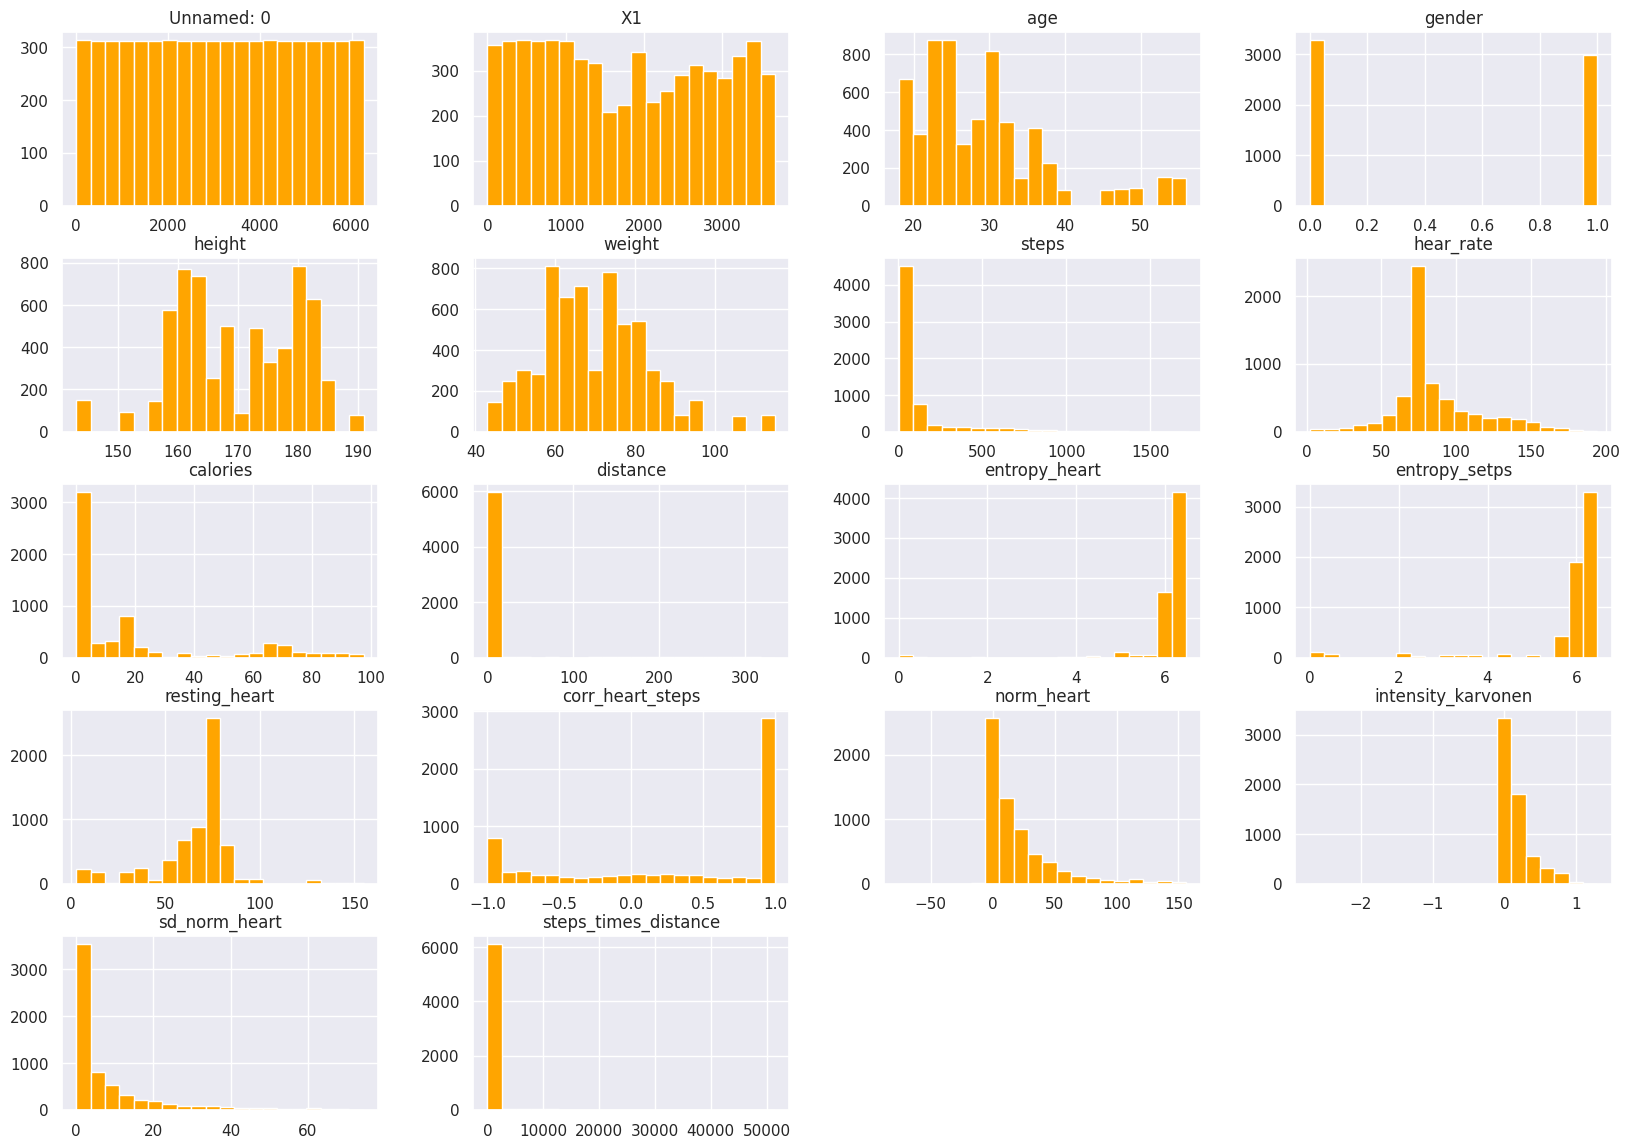

In [33]:
# plt.rcParams.update({'font.size': 10})

sns.set(font_scale = 1)

data.hist(bins = 20, color = 'orange', figsize = (20, 14))

In [34]:
data.activity.value_counts()

activity
Lying             1379
Running 7 METs    1114
Running 5 METs    1002
Running 3 METs     950
Sitting            930
Self Pace walk     889
Name: count, dtype: int64

<Axes: >

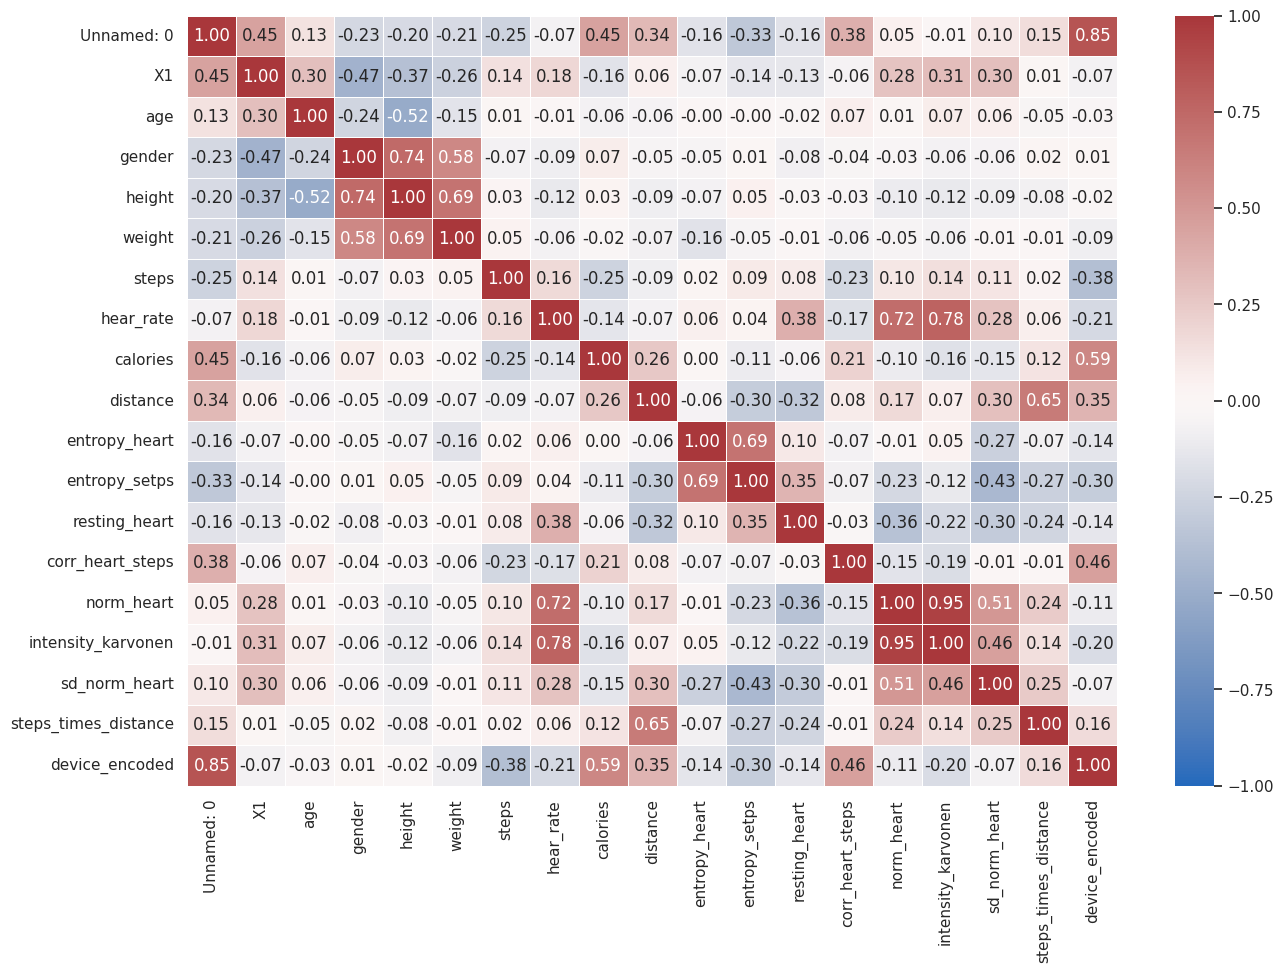

In [35]:
le = LabelEncoder()
data['device_encoded'] = le.fit_transform(data['device'])
plt.figure(figsize=(15,10))
# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=['number'])
sns.heatmap(numerical_data.corr(), annot=True, center=0, linewidths=.5, fmt='.2f', vmin=-1, vmax=1, cmap='vlag')

In [36]:
data[data.activity == 'Lying'].head()

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,...,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity,device_encoded
0,1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,...,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying,0
1,2,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,...,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying,0
2,3,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,...,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying,0
3,4,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,...,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying,0
4,5,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,...,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying,0


In [37]:
data[data.activity == 'Running 7 METs'].head()

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,...,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity,device_encoded
63,64,64,20,1,168.0,65.4,14.222222,59.50,17.9738,0.009949,...,6.116349,59.0,0.805555,0.50,0.003546,4.037345,0.141495,apple watch,Running 7 METs,0
64,65,65,20,1,168.0,65.4,14.111111,60.25,17.9766,0.009594,...,6.116349,59.0,0.971239,1.25,0.008865,5.074692,0.135388,apple watch,Running 7 METs,0
65,66,66,20,1,168.0,65.4,14.000000,61.00,17.9794,0.009240,...,6.116349,59.0,0.989896,2.00,0.014184,6.422616,0.129360,apple watch,Running 7 METs,0
66,67,67,20,1,168.0,65.4,81.583333,64.00,17.9822,0.053872,...,6.116349,59.0,0.996166,5.00,0.035461,7.526619,4.395030,apple watch,Running 7 METs,0
67,68,68,20,1,168.0,65.4,149.166667,67.00,17.9850,0.098503,...,6.116349,59.0,0.659855,8.00,0.056738,8.625262,14.693414,apple watch,Running 7 METs,0


In [38]:
data.device.value_counts()

device
apple watch    3656
fitbit         2608
Name: count, dtype: int64

In [39]:
np.random.seed(42)

In [40]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size = 0.2, random_state = 42)
# print(train_set)
# print(test_set)

DATA **CLEANING**

In [41]:
train_set.isnull().sum()

Unnamed: 0              0
X1                      0
age                     0
gender                  0
height                  0
weight                  0
steps                   0
hear_rate               0
calories                0
distance                0
entropy_heart           0
entropy_setps           0
resting_heart           0
corr_heart_steps        0
norm_heart              0
intensity_karvonen      0
sd_norm_heart           0
steps_times_distance    0
device                  0
activity                0
device_encoded          0
dtype: int64

In [42]:
train_set.duplicated().sum()

0

**DATA ANALYSIS**

In [43]:
train_set.columns

Index(['Unnamed: 0', 'X1', 'age', 'gender', 'height', 'weight', 'steps',
       'hear_rate', 'calories', 'distance', 'entropy_heart', 'entropy_setps',
       'resting_heart', 'corr_heart_steps', 'norm_heart', 'intensity_karvonen',
       'sd_norm_heart', 'steps_times_distance', 'device', 'activity',
       'device_encoded'],
      dtype='object')

In [44]:
categorical_df = train_set.select_dtypes(include = 'object')

categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5011 entries, 2024 to 860
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   device    5011 non-null   object
 1   activity  5011 non-null   object
dtypes: object(2)
memory usage: 117.4+ KB


In [45]:
for col in categorical_df.columns:
    print(f'{col}: {categorical_df[col].nunique()}')
    print('\n')

device: 2


activity: 6




In [46]:
import plotly.graph_objects as go

In [47]:
labels = ['Lying','Running 7 METs','Running 5 METs','Running 3 METs', 'Sitting', 'Self Pace walk']
values = train_set['activity'].value_counts()
colors = ['red', 'royalblue','green','yellow','pink','grey']
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.5)])
fig.update_traces(hoverinfo='label+value',textfont_size=15,marker=dict(colors=colors))
fig.update_layout(annotations=[dict(text='6 types of Activity',
                                    x=0.50, y=0.5, font_size=15,
                                    showarrow=False)])
fig.show()

In [48]:
num_df = train_set.select_dtypes(include = 'number')

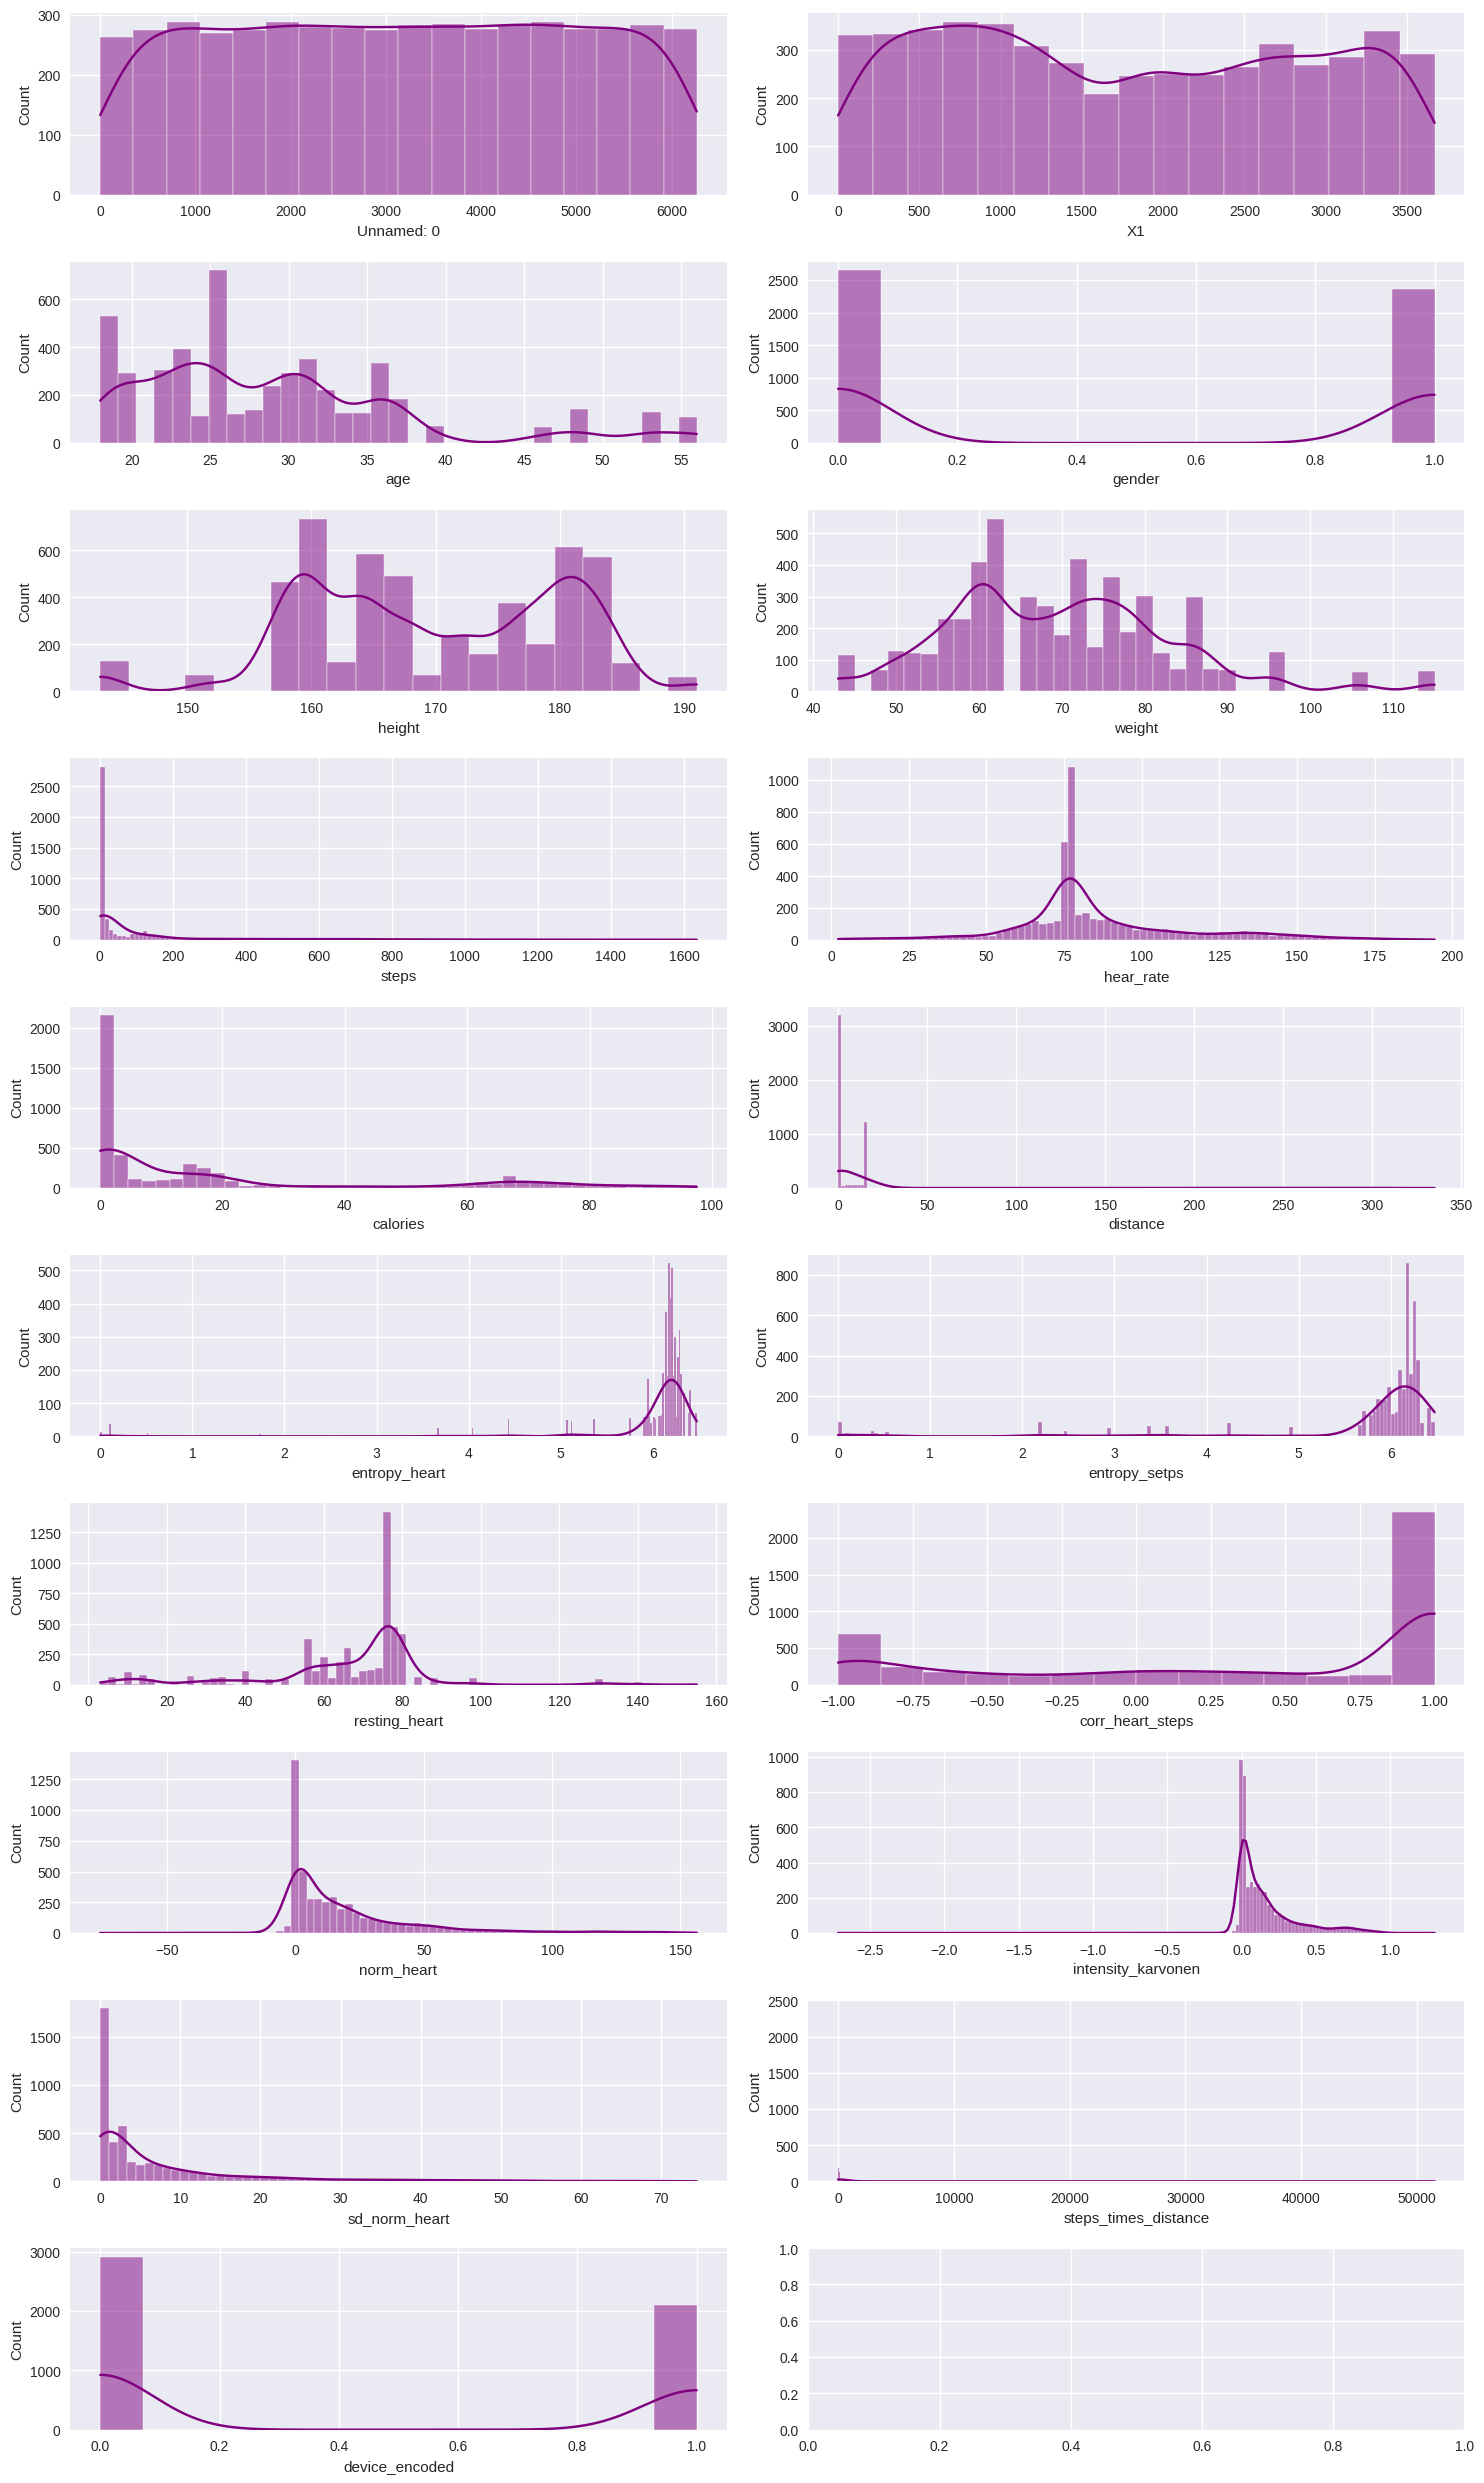

In [49]:
plt.style.use('seaborn')

names = list(num_df.columns)

plot_per_row = 2

f, axes = plt.subplots(round(len(names)/plot_per_row), plot_per_row, figsize = (15, 25))

y = 0;

for name in names:
    i, j = divmod(y, plot_per_row)
    sns.histplot(x=num_df[name], kde = True, ax=axes[i, j], color = 'purple')
    y = y + 1

plt.tight_layout()
plt.show()

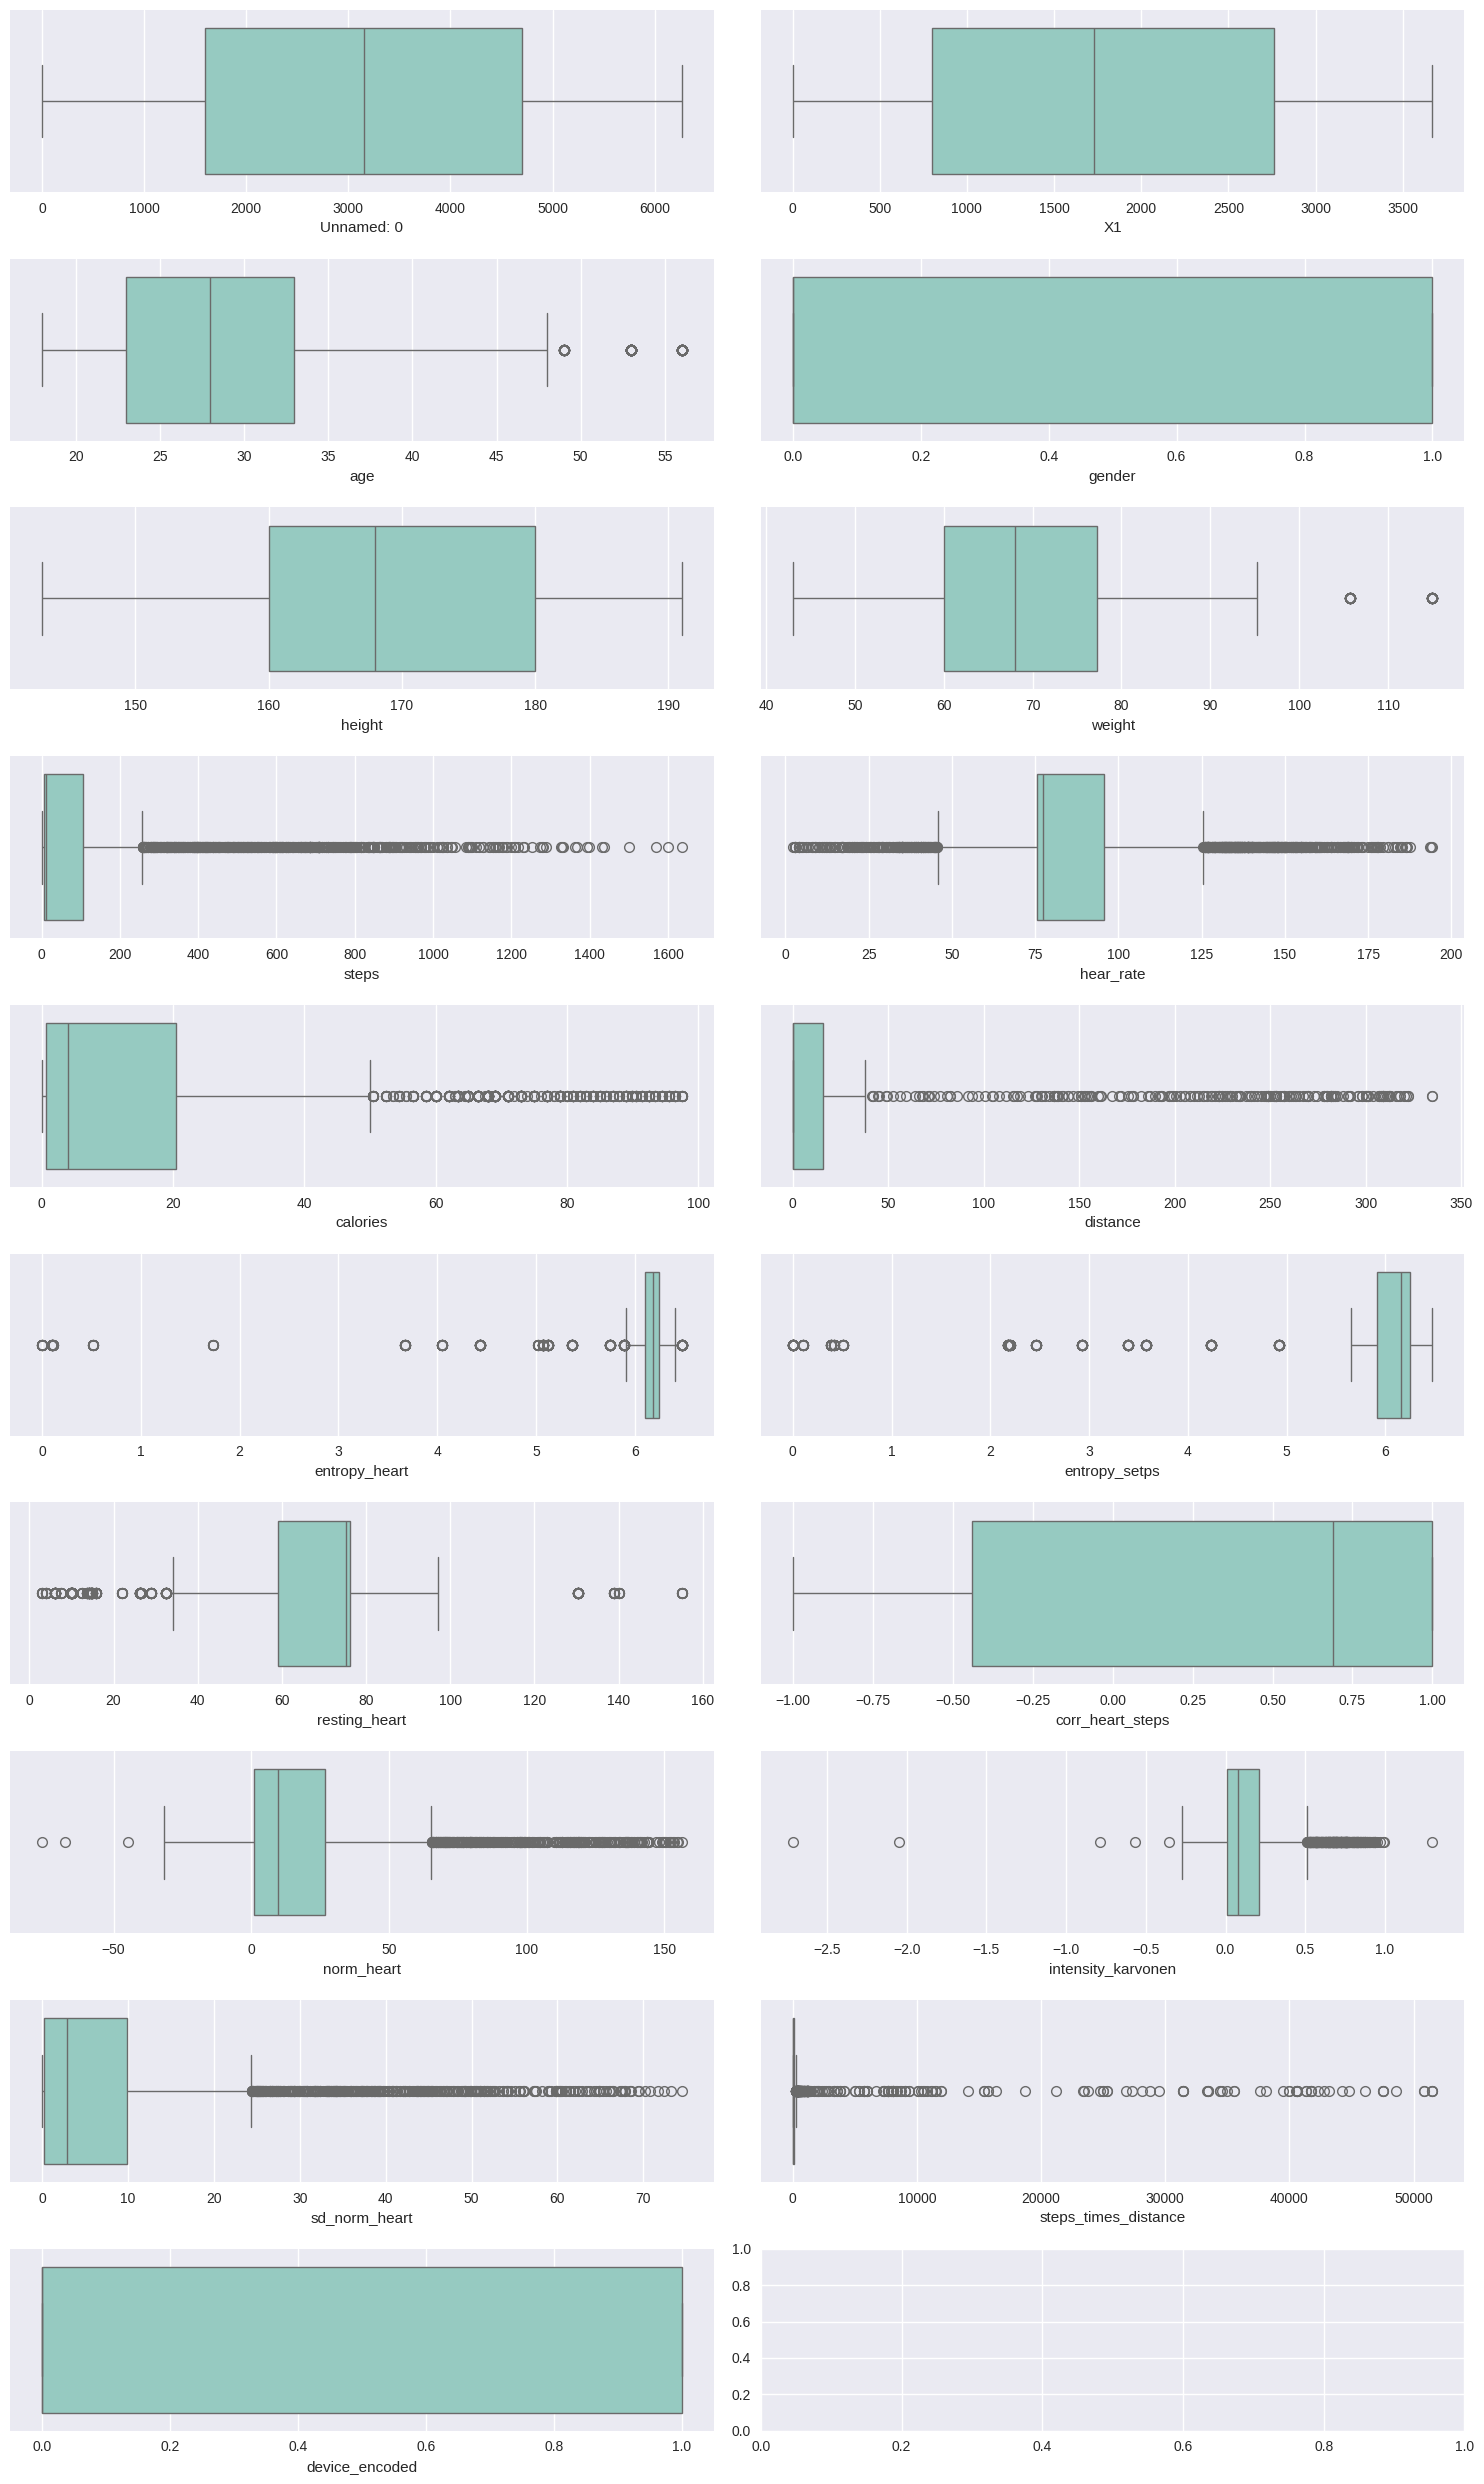

In [50]:
plt.style.use('seaborn')

names = list(num_df.columns)

plot_per_row = 2

f, axes = plt.subplots(round(len(names)/plot_per_row), plot_per_row, figsize = (15, 25))

y = 0;

for name in names:
    i, j = divmod(y, plot_per_row)
    sns.boxplot(x=num_df[name], ax=axes[i, j], palette = 'Set3')
    y = y + 1

plt.tight_layout()
plt.show()

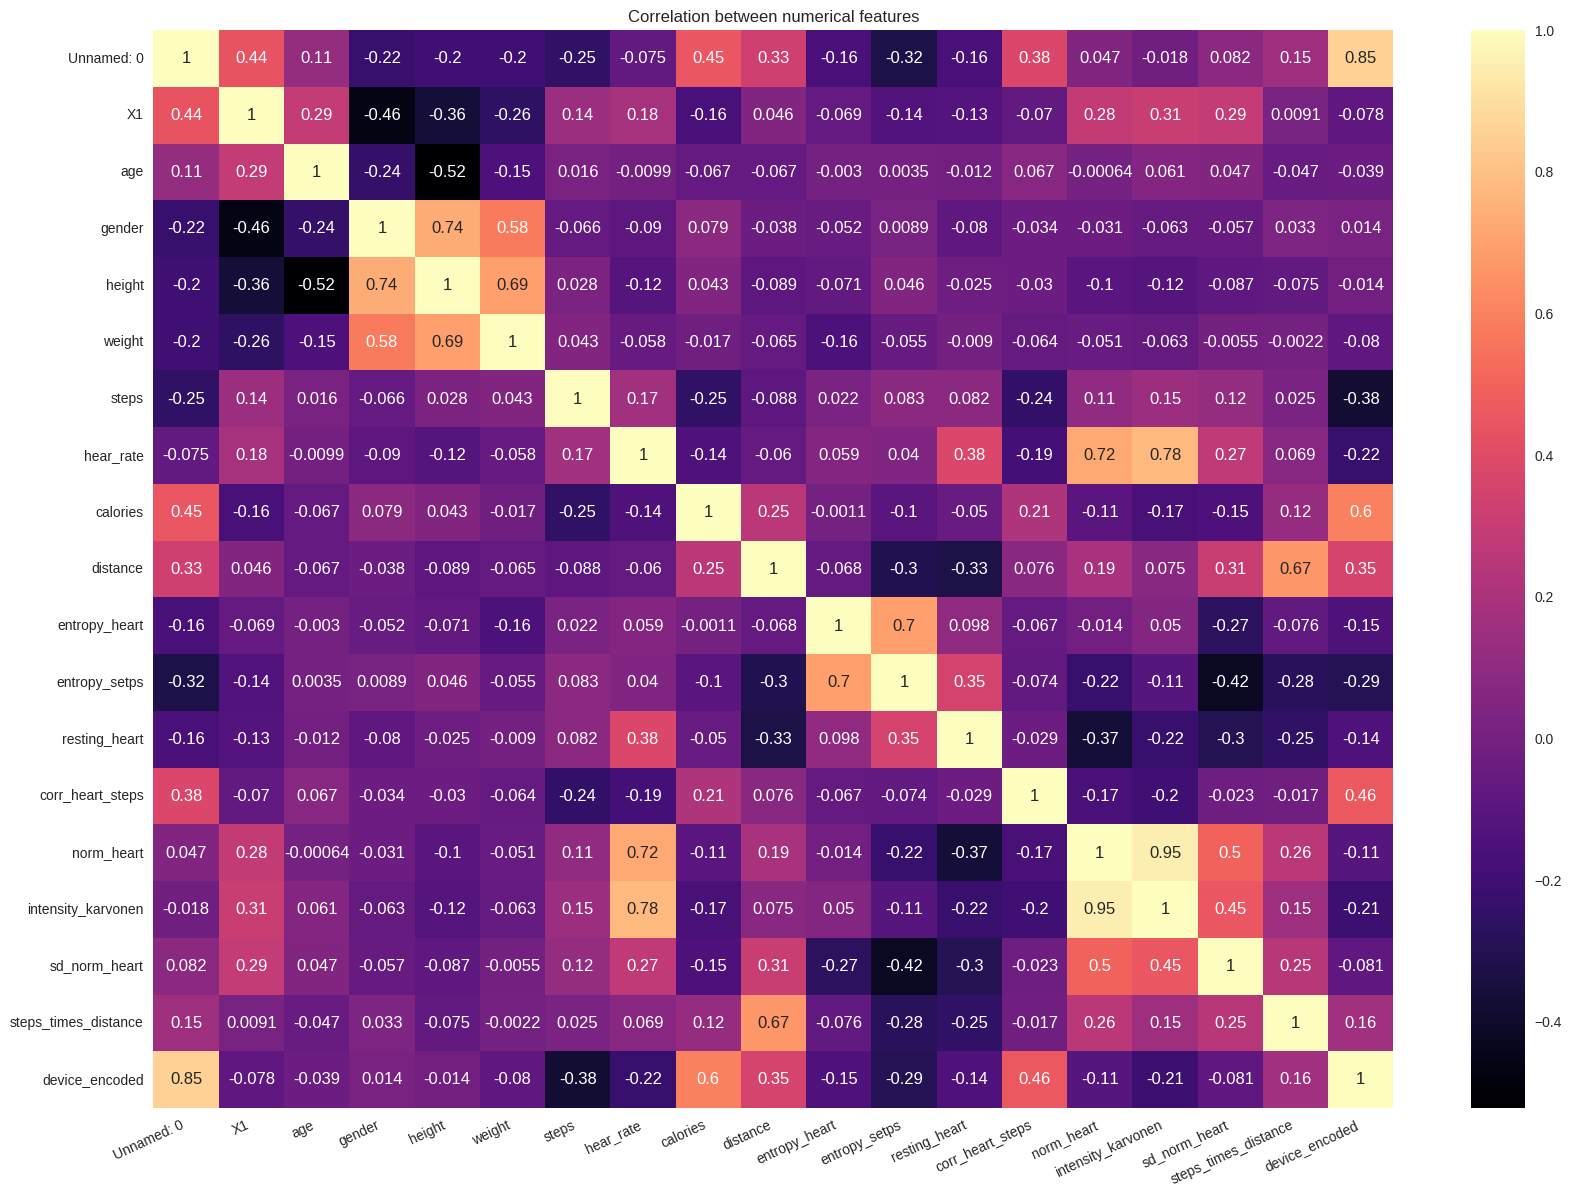

In [51]:
plt.figure(figsize = (20, 14))

corr_matrix = num_df.corr()

g = sns.heatmap(
    corr_matrix,
    annot = True,
    cmap='magma',
)

g.set_xticklabels(g.get_xticklabels(), rotation=25, horizontalalignment='right')

plt.title('Correlation between numerical features')
plt.show()

In [52]:
df_a = data[data['device']=='apple watch'].copy()
df_a.reset_index(drop=True,inplace=True)

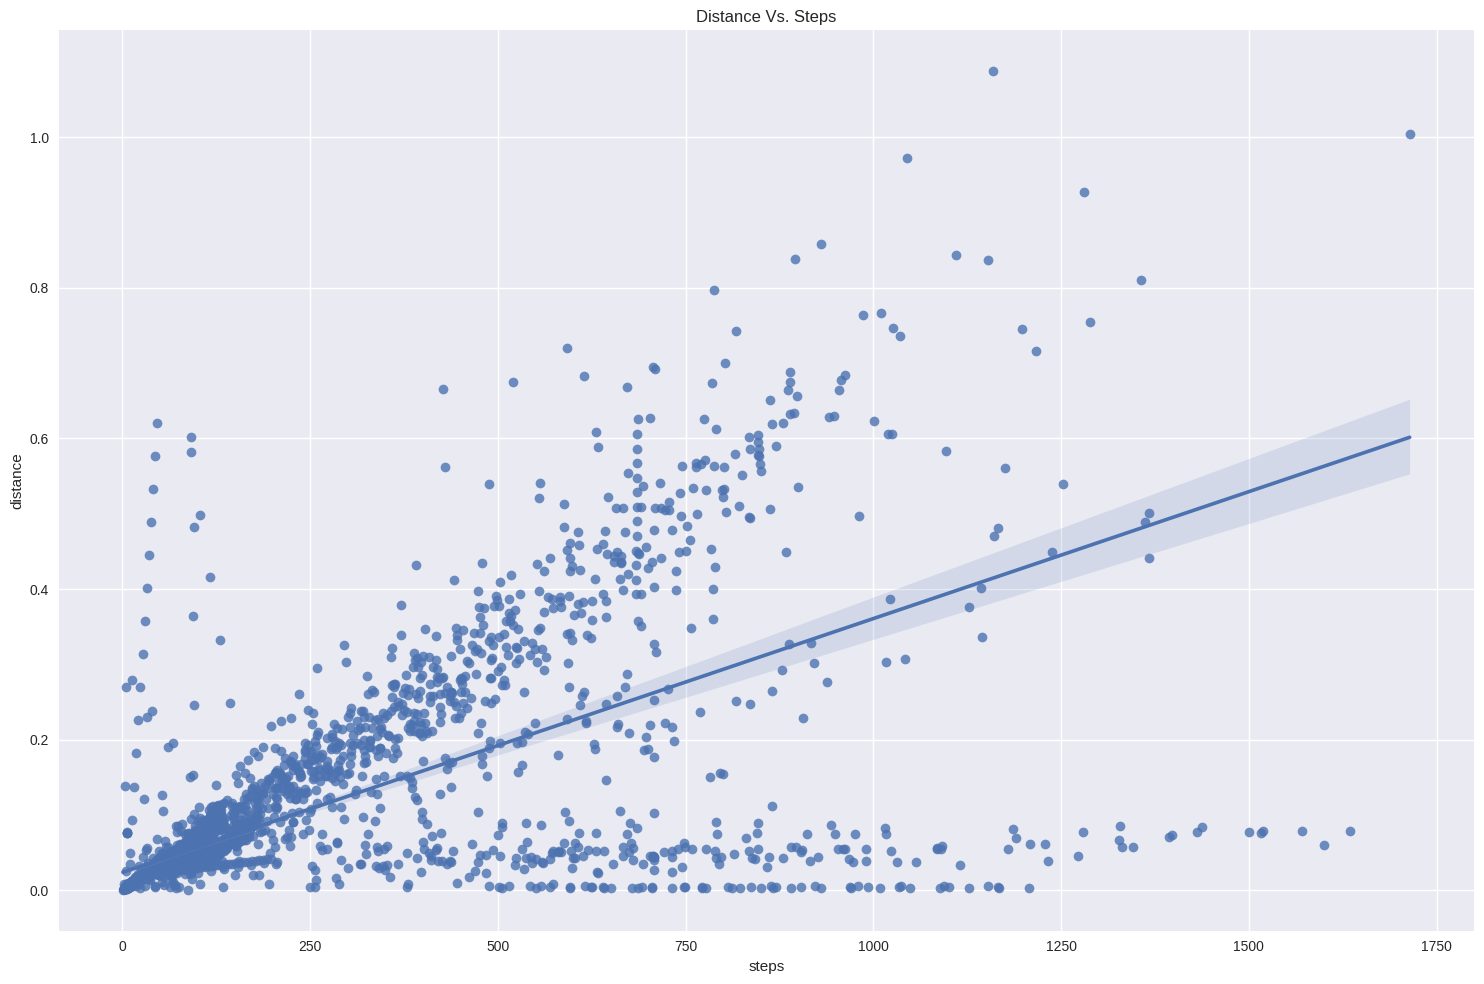

In [53]:
plt.figure(figsize=(15,10))
sns.regplot(data = df_a, x='steps', y='distance')
plt.title('Distance Vs. Steps')
plt.tight_layout()

**FEATURES-TARGET SPLIT**

In [54]:
X_train = train_set.copy()
y_train = X_train.pop("activity")
y_train


2024    Running 7 METs
3277             Lying
5015    Running 7 METs
2572    Running 3 METs
1024    Running 5 METs
             ...      
3772    Running 5 METs
5191           Sitting
5226             Lying
5390    Running 7 METs
860     Running 3 METs
Name: activity, Length: 5011, dtype: object

In [55]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)

In [56]:
X_test = test_set.copy()
y_test = X_test.pop("activity")
y_test = label_encoder.fit_transform(y_test)

**DATA PIPELINE**

In [57]:
SimpleImputer.get_feature_names_out = (lambda self, names=None:
                                       self.feature_names_in_)

num_attribs = ['Unnamed: 0', 'X1', 'age', 'gender', 'height', 'weight', 'steps',
       'hear_rate', 'calories', 'distance', 'entropy_heart', 'entropy_setps',
       'resting_heart', 'corr_heart_steps', 'norm_heart', 'intensity_karvonen',
       'sd_norm_heart', 'steps_times_distance']

cat_attribs = ['device']

num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                             RobustScaler())

cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"),
                             OneHotEncoder(handle_unknown="ignore"))

preprocessing = make_column_transformer(
    (num_pipeline, num_attribs),
    (cat_pipeline, cat_attribs))

In [58]:
preprocessing

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('robustscaler',
                                                  RobustScaler())]),
                                 ['Unnamed: 0', 'X1', 'age', 'gender', 'height',
                                  'weight', 'steps', 'hear_rate', 'calories',
                                  'distance', 'entropy_heart', 'entropy_setps',
                                  'resting_heart', 'corr_heart_steps',
                                  'norm_heart', 'intensity_karvonen',
                                  'sd_norm_heart', 'steps_times_distance']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['device'])])

In [59]:
def print_score(classifier, X_train, y_train, X_test, y_test):

    # Training set

    print('\n\n')

    print("TRAINING RESULTS:\n")

    # Predict
    y_train_pred = classifier.predict(X_train)

    # Evaluation
    print(f'Classification Report:\n{classification_report(y_train, y_train_pred, digits = 4)}\n')

#     print(f'ROC AUC Score: {roc_auc_score(y_train, y_train_pred)}\n')

    print(f'Confusion Matrix:\n{confusion_matrix(y_train, y_train_pred)}\n')

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
    ax[0].set_title("train")
    ax[1].set_title("test")

    print(sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt="g", ax=ax[0]))

    print('\n\n')

    # Test set

    print("TEST RESULTS:\n")

    # Predict
    y_test_pred = classifier.predict(X_test)

    # Evaluation
    print(f'Classification Report:\n{classification_report(y_test, y_test_pred, digits = 4)}\n')

#     print(f'ROC AUC Score: {roc_auc_score(y_test, y_test_pred)}\n')

    print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_test_pred)}\n')

    print(sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="g", ax=ax[1]))

    print('\n\n')

**LOGISTIC REGRESSION**

In [60]:
from sklearn.linear_model import LogisticRegression
import scipy.stats as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
# from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [61]:
classifier = make_pipeline(preprocessing, LinearRegression())

classifier.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['Unnamed: 0', 'X1', 'age',
                                                   'gender', 'height', 'weight',
                                                   'steps', 'hear_rate',
                                                   'calories', 'distance',
                                                   'entropy_heart',
                                                   'entropy_setps',
                                                   'resting_heart',
                                                   'corr_heart_steps',
                                                   'norm_heart',
                                                   'intensity_karvonen',
                                                   'sd_norm_heart',
                                                   'steps_times_distance']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['device'])])),
                ('linearregression', LinearRegression())])

In [62]:
classifier = Pipeline([
    ("preprocessing", preprocessing),
    ("logistic_regression", LogisticRegression()),
])

classifier.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['Unnamed: 0', 'X1', 'age',
                                                   'gender', 'height', 'weight',
                                                   'steps', 'hear_rate',
                                                   'calories', 'distance',
                                                   'entropy_heart',
                                                   'entropy_setps',
                                                   'resting_heart',
                                                   'corr_heart_steps',
                                                   'norm_heart',
                                                   'intensity_karvonen',
                                                   'sd_norm_heart',
                                                   'steps_times_distance']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['device'])])),
                ('logistic_regression', LogisticRegression())])

In [64]:
# Predict
y_train_pred = classifier.predict(X_train)
y_train_pred

array([3, 0, 3, ..., 0, 0, 0])

In [65]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,y_train_pred)
accuracy

0.33446417880662543

In [66]:
classifier.named_steps["logistic_regression"].get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}




TRAINING RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.3364    0.6709    0.4481      1106
           1     0.2947    0.2232    0.2540       775
           2     0.3551    0.3426    0.3487       794
           3     0.4429    0.3618    0.3982       879
           4     0.2350    0.1983    0.2151       711
           5     0.2239    0.0402    0.0682       746

    accuracy                         0.3345      5011
   macro avg     0.3147    0.3062    0.2887      5011
weighted avg     0.3204    0.3345    0.3040      5011


Confusion Matrix:
[[742  77  46  91 114  36]
 [235 173 143  69 144  11]
 [178  97 272 124 112  11]
 [366  38 121 318  18  18]
 [241 139 118  44 141  28]
 [444  63  66  72  71  30]]

Axes(0.125,0.11;0.281818x0.77)



TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.3363    0.6850    0.4511       273
           1     0.2128    0.1714    0.1899     

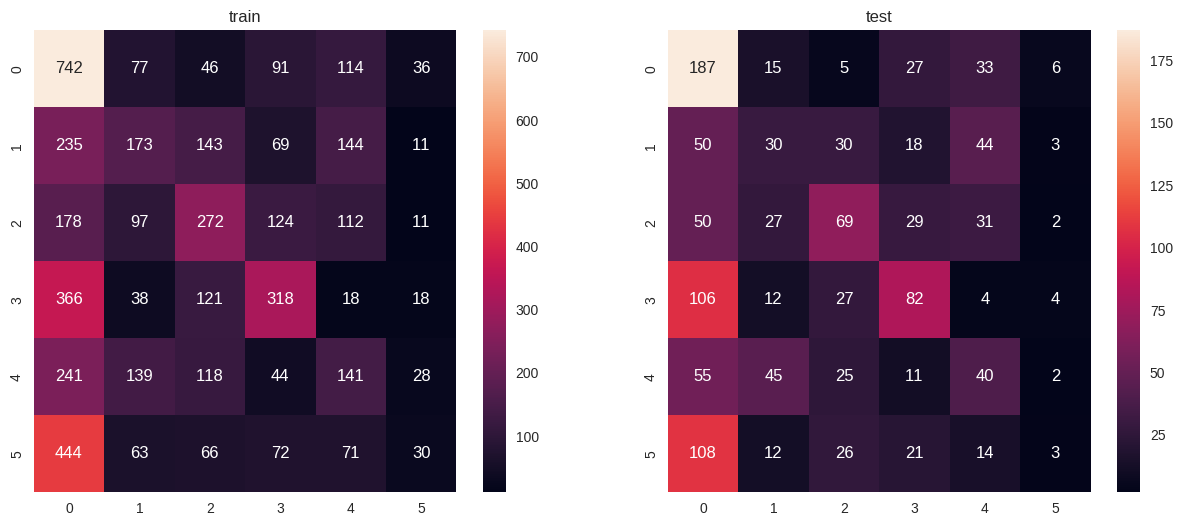

In [67]:
print_score(classifier, X_train, y_train, X_test, y_test)

In [68]:
C = 100
penalty = 'l2'
solver = 'newton-cg'
max_iter = 1000

classifier = Pipeline([
    ("preprocessing", preprocessing),
    ("logistic_regression", LogisticRegression(C=C, penalty = penalty, solver = solver, max_iter = max_iter)),
])

classifier.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['Unnamed: 0', 'X1', 'age',
                                                   'gender', 'height', 'weight',
                                                   'steps', 'hear_rate',
                                                   'calories', 'distance',
                                                   'entropy_heart',
                                                   'entropy_setps',
                                                   'resting_heart',
                                                   'corr_heart_steps',
                                                   'norm_heart',
                                                   'intensity_karvonen',
                                                   'sd_norm_heart',
                                                   'steps_times_distance']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['device'])])),
                ('logistic_regression',
                 LogisticRegression(C=100, max_iter=1000, solver='newton-cg'))])

In [69]:
classifier.named_steps["logistic_regression"].get_params()

{'C': 100,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [70]:
feature_names = classifier[:-1].get_feature_names_out()

importances = pd.DataFrame(data={
    'Attribute': feature_names,
    'Importance': classifier.named_steps["logistic_regression"].coef_[0]
})

In [71]:
importances
importances = importances.sort_values(by='Importance', ascending=False)

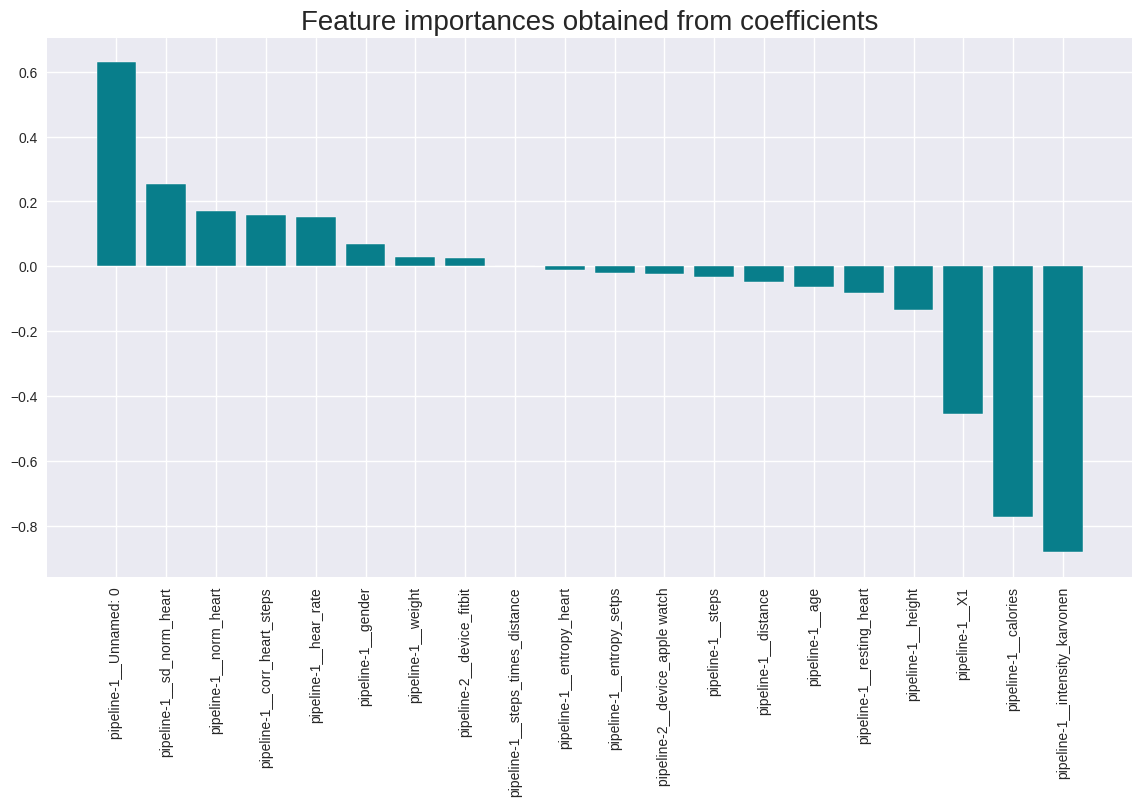

In [72]:
plt.figure(figsize = (14, 7))

plt.bar(x=importances['Attribute'], height = importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation=90)
plt.show()

In [73]:
# lgbm = create_model("lightgbm")
# plot_model(estimator = lgbm , plot= "learning")

**RANDOM FOREST**

In [74]:
classifier = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestClassifier(random_state = 42)),
])

classifier.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['Unnamed: 0', 'X1', 'age',
                                                   'gender', 'height', 'weight',
                                                   'steps', 'hear_rate',
                                                   'calories', 'distance',
                                                   'entropy_heart',
                                                   'entropy_setps',
                                                   'resting_heart',
                                                   'corr_heart_steps',
                                                   'norm_heart',
                                                   'intensity_karvonen',
                                                   'sd_norm_heart',
                                                   'steps_times_distance']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['device'])])),
                ('random_forest', RandomForestClassifier(random_state=42))])

In [75]:
classifier.named_steps["random_forest"].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}




TRAINING RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1106
           1     1.0000    1.0000    1.0000       775
           2     1.0000    1.0000    1.0000       794
           3     1.0000    1.0000    1.0000       879
           4     1.0000    1.0000    1.0000       711
           5     1.0000    1.0000    1.0000       746

    accuracy                         1.0000      5011
   macro avg     1.0000    1.0000    1.0000      5011
weighted avg     1.0000    1.0000    1.0000      5011


Confusion Matrix:
[[1106    0    0    0    0    0]
 [   0  775    0    0    0    0]
 [   0    0  794    0    0    0]
 [   0    0    0  879    0    0]
 [   0    0    0    0  711    0]
 [   0    0    0    0    0  746]]

Axes(0.125,0.11;0.281818x0.77)



TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.8539    0.8352    0.8444       273
           1

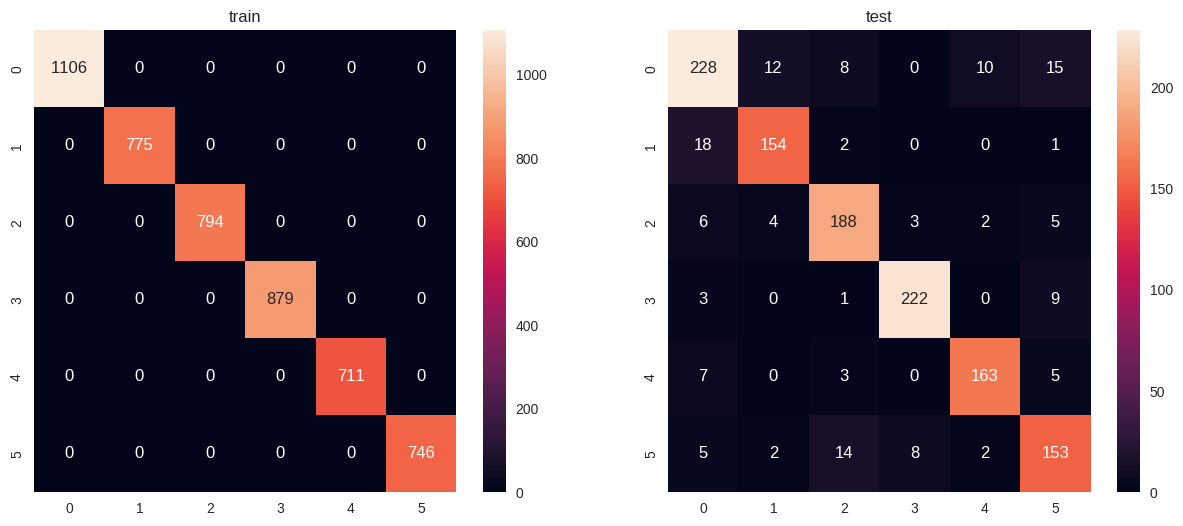

In [76]:
print_score(classifier, X_train, y_train, X_test, y_test)

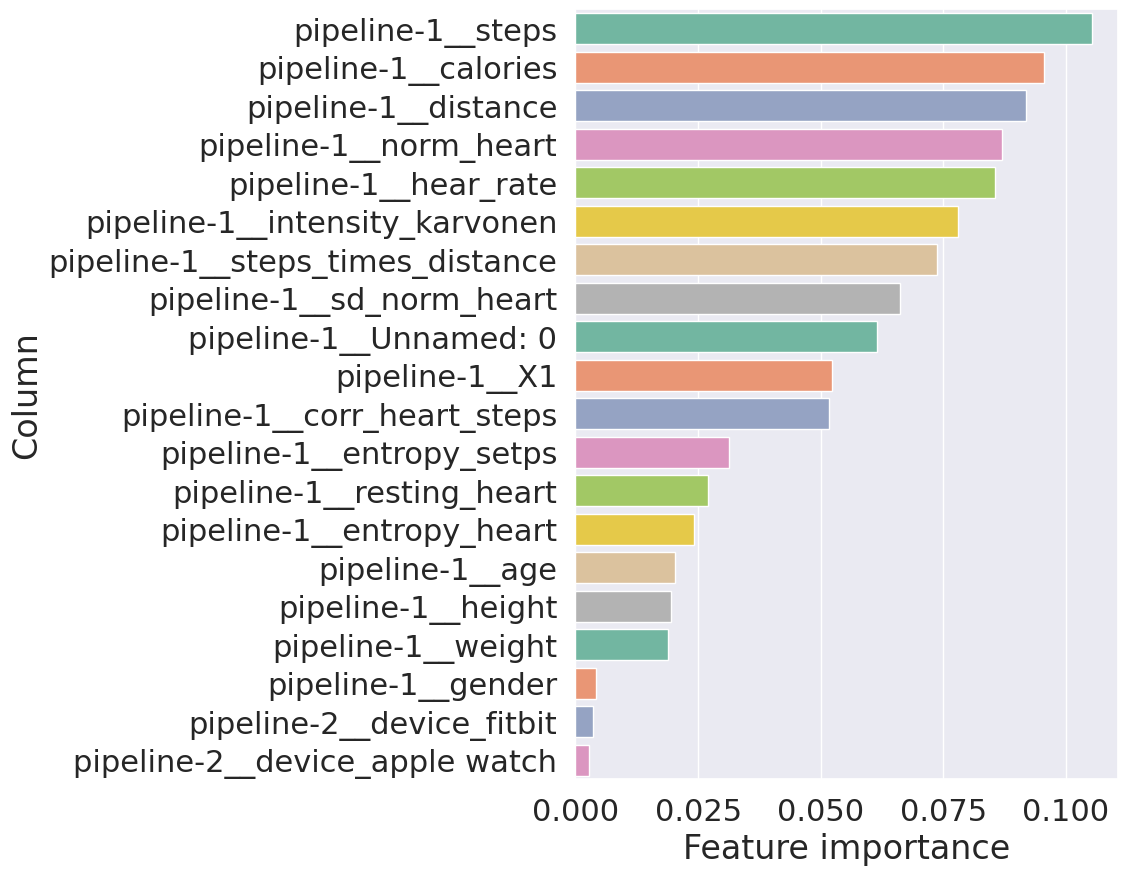

In [77]:
features_importance = pd.DataFrame(
    {
        'Column': feature_names,
        'Feature importance': classifier.named_steps["random_forest"].feature_importances_
    }
).sort_values('Feature importance', ascending = False)

sns.set(font_scale = 2)
fig, ax = plt.subplots(figsize = (7, 10))
ax = sns.barplot(x = "Feature importance", y = "Column", data = features_importance, palette = "Set2", orient = 'h');

**XGBOOST**

In [78]:
classifier = Pipeline([
    ("preprocessing", preprocessing),
    ("xgboost", XGBClassifier()),
])

classifier.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['Unnamed: 0', 'X1', 'age',
                                                   'gender', 'height', 'weight',
                                                   'steps', 'hear_rate',
                                                   'calories', 'distance',
                                                   'entropy_heart',
                                                   'entropy_setps',
                                                   'resting_heart',
                                                   'corr_heart_steps',
                                                   'norm_hear...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [79]:
classifier.named_steps["xgboost"].get_params()

{'objective': 'multi:softprob',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}




TRAINING RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1106
           1     1.0000    1.0000    1.0000       775
           2     1.0000    1.0000    1.0000       794
           3     1.0000    1.0000    1.0000       879
           4     1.0000    1.0000    1.0000       711
           5     1.0000    1.0000    1.0000       746

    accuracy                         1.0000      5011
   macro avg     1.0000    1.0000    1.0000      5011
weighted avg     1.0000    1.0000    1.0000      5011


Confusion Matrix:
[[1106    0    0    0    0    0]
 [   0  775    0    0    0    0]
 [   0    0  794    0    0    0]
 [   0    0    0  879    0    0]
 [   0    0    0    0  711    0]
 [   0    0    0    0    0  746]]

Axes(0.125,0.11;0.281818x0.77)



TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.8667    0.8095    0.8371       273
           1

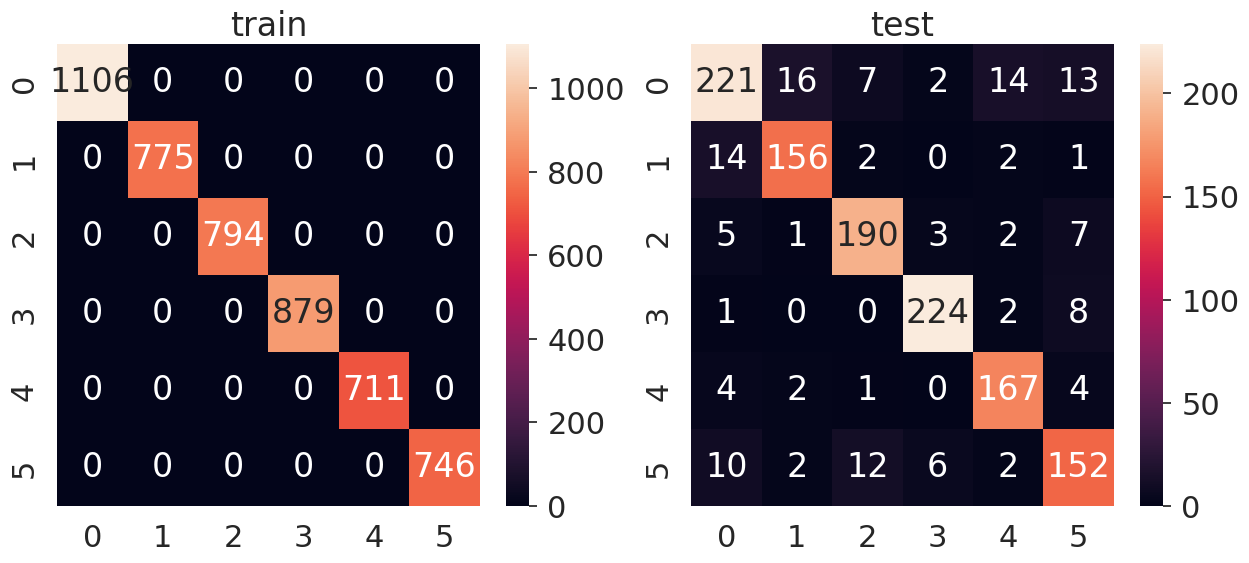

In [80]:
print_score(classifier, X_train, y_train, X_test, y_test)

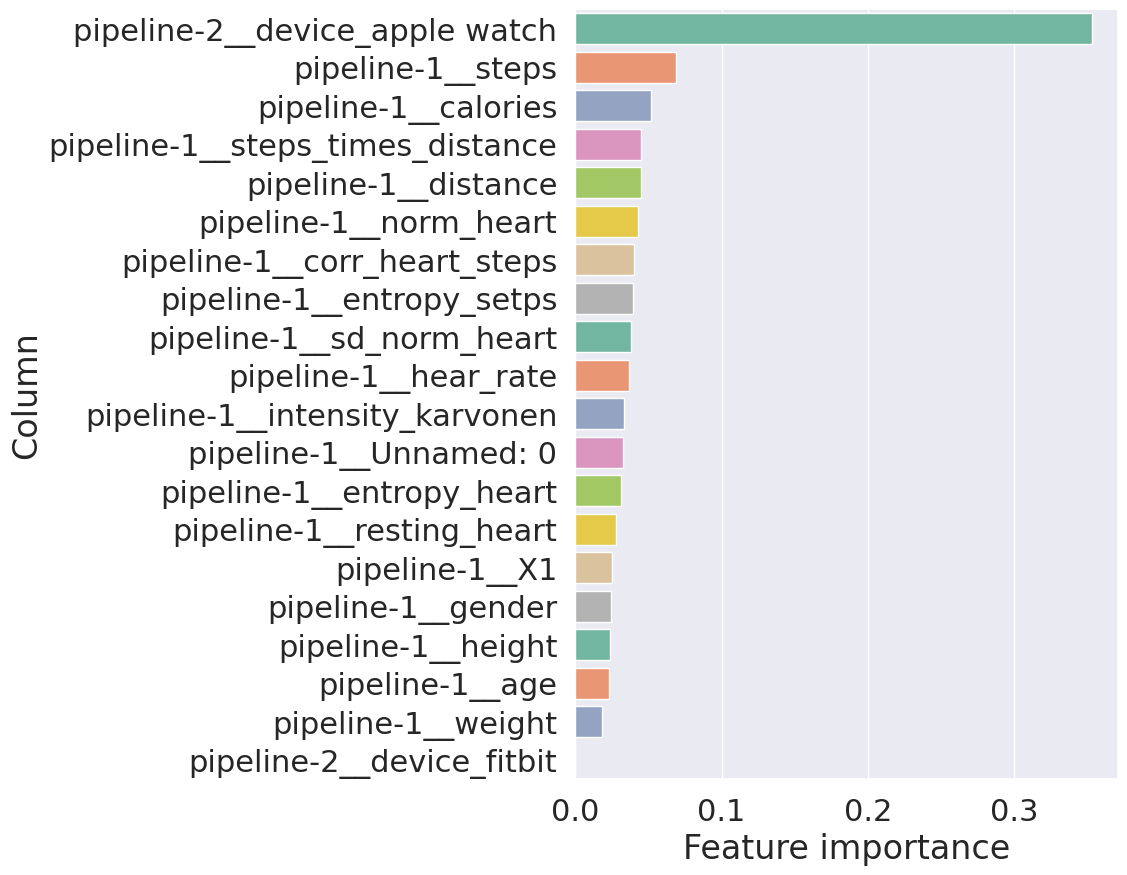

In [81]:
features_importance = pd.DataFrame(
    {
        'Column': feature_names,
        'Feature importance': classifier.named_steps["xgboost"].feature_importances_
    }
).sort_values('Feature importance', ascending = False)

sns.set(font_scale = 2)
fig, ax = plt.subplots(figsize = (7, 10))
ax = sns.barplot(x = "Feature importance", y = "Column", data = features_importance, palette = "Set2", orient = 'h');